# Homework 7 - Part A

*Note that there are two different notebooks for HW assignment 7. This is part A. There will be two different assignments in gradescope for each part. The deadlines are the same for both parts.*

## References

+ Lectures 24-26 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")


import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name: Shaunak**
+ **Last Name: Mukherjee**
+ **Email: mukher86@purdue.edu**

In this problem, you must use a deep neural network (DNN) to perform a regression task.
The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#)
From this reference, the description of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
>
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. The angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level in decibels.

You will have to do regression between the inputs and the output using a DNN.
Before we start, let's download and load the data.

In [ ]:
!curl -O --insecure "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59984    0 59984    0     0   298k      0 --:--:-- --:--:-- --:--:--  300k


The data are in simple text format.
Here is how we can load them:

In [ ]:
data = np.loadtxt('airfoil_self_noise.dat')
data

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.26201e+02],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25201e+02],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25951e+02],
       ...,
       [4.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06604e+02],
       [5.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06224e+02],
       [6.30000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.04204e+02]])

You may work directly with `data`, but, for your convenience, I am going to put them also in a nice Pandas DataFrame:

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                                 'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

,Frequency,Angle_of_attack,Chord_length,Velocity,Suction_thickness,Sound_pressure
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.052849,110.264
1499,3150.0,15.6,0.1016,39.6,0.052849,109.254
1500,4000.0,15.6,0.1016,39.6,0.052849,106.604
1501,5000.0,15.6,0.1016,39.6,0.052849,106.224


### Part A - Analyze the data visually

It is always a good idea to visualize the data before you start doing anything with them.

#### Part A.I. - Do the histograms of all variables
Use as many code segments as you need below to plot the histogram of each variable (all inputs and the output in separate plots)
Discuss whether or not you need to standardize the data before moving to regression.

**Answer:**

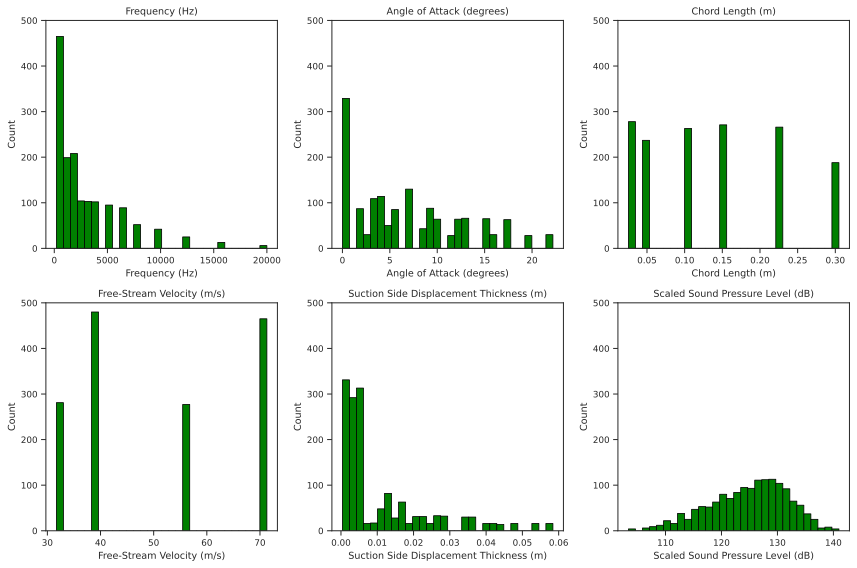

In [ ]:
# Define column names
columns = ['Frequency (Hz)', 'Angle of Attack (degrees)', 'Chord Length (m)',
           'Free-Stream Velocity (m/s)', 'Suction Side Displacement Thickness (m)',
           'Scaled Sound Pressure Level (dB)']

# Plot histograms
plt.figure(figsize=(12, 8))

for i in range(data.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.hist(data[:, i], bins=30, edgecolor='black', color = 'g')
    plt.title(columns[i])
    plt.xlabel(columns[i])
    plt.ylabel('Count')
    plt.ylim(0,500)
plt.tight_layout()
plt.show()

**Answer** Clealy, these variable's data occupy different scales. The maximum of 'scaled sound pressure' and 'Freqeuncy' are at drastically different scales. So we need to standarize the data before performing regression analysis.

#### Part A.II - Do the scatter plots between all input variables

Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions.
Whatever model you build will only be valid inside the domain implicitly defined with your experimental conditions.
Are there any holes in the dataset, i.e., places where you have no data?

**Answer:**

In [ ]:
# Define function to plot scatterplot matrix between all input variables
def plot_scatter_matrix(df):
    n_features = df.shape[1]
    fig, ax = plt.subplots(n_features, n_features)
    fig.set_size_inches(10,8)


    for i in range(n_features):
        for j in range(n_features):
            ax[i, j].scatter(df.iloc[:, j], df.iloc[:, i], alpha=0.5, color = 'g', edgecolor = 'k')
            ax[i, j].grid(True)
            if j == 0:
                ax[i, j].set_ylabel(df.columns[i])
            if i == n_features - 1:
                ax[i, j].set_xlabel(df.columns[j])
            if i != n_features - 1:
                ax[i, j].xaxis.set_ticklabels([])
            if j != 0:
                ax[i, j].yaxis.set_ticklabels([])

    plt.tight_layout()
    plt.show()
plot_scatter_matrix(df)

Output hidden; open in https://colab.research.google.com to view.

This output above doesnt appear when I convert the main homework to pdf so I have added the pdf printscreen of the output below.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

                   Frequency  Angle_of_attack  Chord_length  Velocity  \
Frequency           1.000000        -0.272765     -0.003661  0.133664   
Angle_of_attack    -0.272765         1.000000     -0.504868  0.058760   
Chord_length       -0.003661        -0.504868      1.000000  0.003787   
Velocity            0.133664         0.058760      0.003787  1.000000   
Suction_thickness  -0.230107         0.753394     -0.220842 -0.003974   
Sound_pressure     -0.390711        -0.156108     -0.236162  0.125103   

                   Suction_thickness  Sound_pressure  
Frequency                  -0.230107       -0.390711  
Angle_of_attack             0.753394       -0.156108  
Chord_length               -0.220842       -0.236162  
Velocity                   -0.003974        0.125103  
Suction_thickness           1.000000       -0.312670  
Sound_pressure             -0.312670        1.000000  


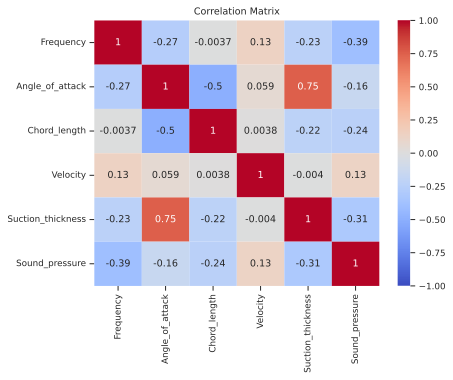

In [ ]:
# Define function to tabulate and plot variable correlation among the variables
def display_correlation_matrix(df):
    correlation_matrix = df.corr()
    print(correlation_matrix)
    plt.figure()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
display_correlation_matrix(df)

**Answer** Most of the scatterplots show concentrated datapoints at lower values of variables. Also there seem to be gaps for some variables, for example for frequency at higher end, chord length has intermitant gap and velocity throughout show gap between datapoints. Some variables like suction_thickness is more uniform across the measurement range and show less gap.

Also, none of the variables are correlated with each other, except only the suction_thickness and the anel_of_attack are loosely coorelated.



#### Part A.III - Do the scatter plots between each input and the output

Do the scatter plot between each input variable and the output.
This will give you an idea of the functional relationship between the two.
Do you observe any obvious patterns?

**Answer:**

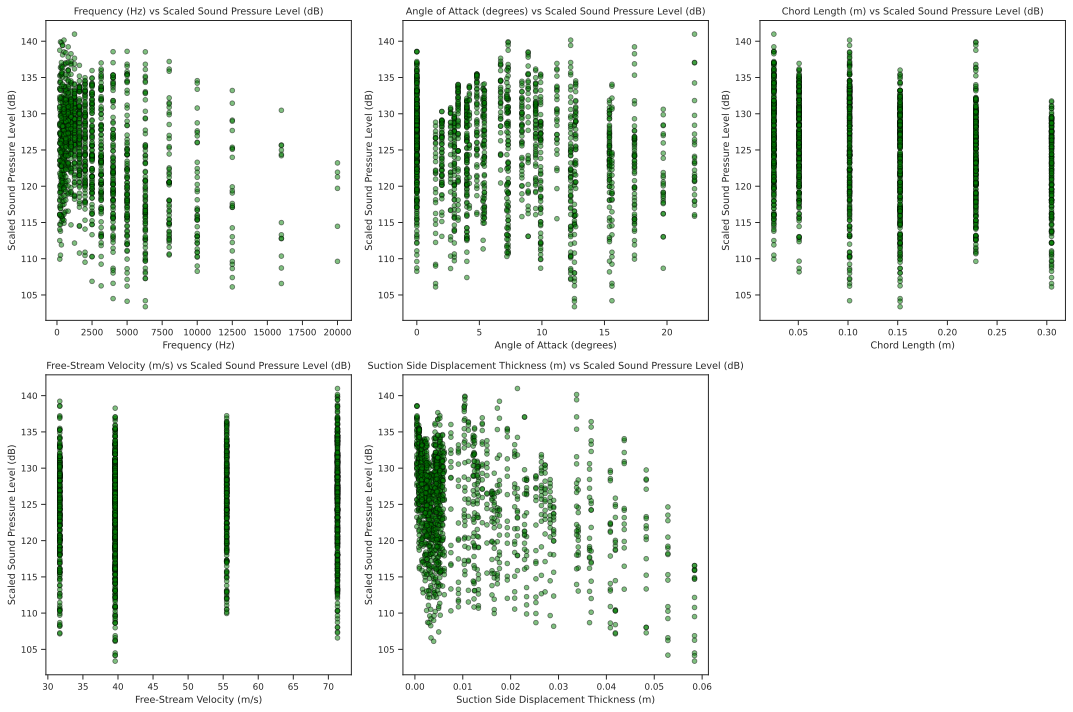

In [ ]:
# Plot scatter plots between each input variable and the output variable
plt.figure(figsize=(15, 10))

for i in range(df.shape[1] - 1):  # Exclude the output column
    plt.subplot(2, 3, i + 1)
    plt.scatter(df.iloc[:, i], df.iloc[:, -1], alpha=0.5, color = 'g', edgecolor = 'k')
    plt.title(f'{columns[i]} vs {columns[-1]}')
    plt.xlabel(columns[i])
    plt.ylabel(columns[-1])

plt.tight_layout()
plt.show()

There are no obvious pattern as also calculated above sound pressure has no correlation with other variables. Again we see, velocity & chord length has gaps in the datasets.

### Part B - Use DNN to do regression

Let start by separating inputs and outputs for you:

In [ ]:
X = data[:, :-1]
y = data[:, -1][:, None]

#### Part B.I - Make the loss

Use standard torch functionality to create a function that gives you the sum of square error followed by an L2 regularization term for the weights and biases of all network parameters (remember that the L2 regularization is like putting a Gaussian prior on each parameter).
Follow the instructions below and fill in the missing code.

**Answer:**

In [ ]:
import torch
import torch.nn as nn

# # Use standard torch functionality to define a function
# # mse_loss(y_obs, y_pred) which gives you the mean of the sum of the square
# # of the difference between y_obs and y_pred
# # Hint: This is already implemented in PyTorch. You can just reuse it.

# Initialize the MSE loss function
mse_loss = nn.MSELoss()

# # Define a function that computes the MSE loss
def compute_mse_loss(y_obs, y_pred):

    return mse_loss(y_pred, y_obs)

In [ ]:

y_obs_tmp = np.random.randn(100, 1)
y_pred_tmp = np.random.randn(100, 1)
print('Your mse_loss: {0:1.2f}'.format(mse_loss(torch.Tensor(y_obs_tmp),
                                                torch.Tensor(y_pred_tmp))))
print('What you should be getting: {0:1.2f}'.format(np.mean((y_obs_tmp - y_pred_tmp) ** 2)))

Your mse_loss: 1.94
What you should be getting: 1.94


In [ ]:
# Now, we will create a regularization term for the loss
# I'm just going to give you this one:
def l2_reg_loss(params):
    """
    This needs an iterable object of network parameters.
    You can get it by doing `net.parameters()`.

    Returns the sum of the squared norms of all parameters.
    """
    l2_reg = torch.tensor(0.)
    for p in params:
        l2_reg += torch.norm(p) ** 2
    return l2_reg

In [ ]:
# Define a function to compute L2 regularization loss
def l2_reg_loss(params):
    """
    Computes the sum of the squared norms of all parameters.
    """
    l2_reg = torch.tensor(0., device=params[0].device)
    for p in params:
        l2_reg += torch.norm(p) ** 2
    return l2_reg

In [ ]:
# Finally, let's add the two together to make a mean square error loss
# plus some weight (which we will call reg_weight) times the sum of the squared norms
# of all parameters.
# I give you the signature and you have to implement the rest of the code:
def loss_func(y_obs, y_pred, reg_weight, params):
    """
    Parameters:
    y_obs      -    The observed outputs
    y_pred     -    The predicted outputs
    reg_weight -    The regularization weight (a positive scalar)
    params     -    An iterable containing the parameters of the network

    Returns the sum of the MSE loss plus reg_weight times the sum of the squared norms of
    all parameters.
    """


    # Compute MSE loss
    mse = compute_mse_loss(y_obs, y_pred)


    # Compute L2 regularization loss
    l2_reg = l2_reg_loss(params)

    # Total loss
    total_loss = mse + reg_weight * l2_reg
    return total_loss

In [ ]:
# You can try your final code here
# First, here is a dummy model
dummy_net = nn.Sequential(nn.Linear(10, 20),
                          nn.Sigmoid(),
                          nn.Linear(20, 1))
loss = loss_func(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp),
                 0.0,
                 list(dummy_net.parameters()))
print('The loss without regularization: {0:1.2f}'.format(loss.item()))
print('This should be the same as this: {0:1.2f}'.format(mse_loss(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp))))
loss = loss_func(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp),
                 0.01,
                 list(dummy_net.parameters()))
print('The loss with regularization: {0:1.2f}'.format(loss.item()))

The loss without regularization: 1.94
This should be the same as this: 1.94
The loss with regularization: 2.01


#### Part B.III - Write flexible code to perform regression

When training neural networks, you must hand-pick many parameters, from the network structure to the activation functions to the regularization parameters to the details of the stochastic optimization.
Instead of mindlessly going through trial and error, it is better to think about the parameters you want to investigate (vary) and write code that allows you to train networks with all different parameter variations repeatedly.
In what follows, I will guide you through writing code for training an arbitrary regression network having the flexibility to:

- standardize the inputs and output or not
- experiment with various levels of regularization
- change the learning rate of the stochastic optimization algorithm
- change the batch size of the optimization algorithm
- change the number of epochs (how many times the optimization algorithm
  does a complete sweep through all the data.

**Answer:**

In [ ]:
# We will start by creating a class that encapsulates a regression
# network so that we can turn on or off input/output standardization
# without too much fuss.
# The class will represent a trained network model.
# It will "know" whether or not during training we standardized the data.
# I am not asking you to do anything here, so you can run this code segment
# or read through it if you want to know the details.
from sklearn.preprocessing import StandardScaler

class TrainedModel(object):
    """
    A class that represents a trained network model.
    The main reason I created this class is to encapsulate the standardization
    process in an excellent way.

    Parameters:

    net            -    A network.
    standardized -    True if the network expects standardized features and outputs
                        standardized targets. False otherwise.
    feature_scaler -    A feature scalar - Ala scikit.learn. Must have transform()
                        and inverse_transform() implemented.
    target_scaler  -    Similar to feature_scaler but for targets...
    """

    def __init__(self, net, standardized=False, feature_scaler=None, target_scaler=None):
        self.net = net
        self.standardized = standardized
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

    def __call__(self, X):
        """
        Evaluates the model at X.
        """
        # If not scaled, then the model is just net(X)
        if not self.standardized:
            return self.net(X)
        # Otherwise:
        # Scale X:
        X_scaled = self.feature_scaler.transform(X)
        # Evaluate the network output - which is also scaled:
        y_scaled = self.net(torch.Tensor(X_scaled))
        # Scale the output back:
        y = self.target_scaler.inverse_transform(y_scaled.detach().numpy())
        return y

In [ ]:
# Go through the code that follows and fill in the missing parts
from sklearn.model_selection import train_test_split
import torch.optim as optim
# We need this for a progress bar:
from tqdm import tqdm


def train_net(X, y, net, reg_weight, n_batch, epochs, lr, test_size=0.33,
              standardize=True):
    """
    A function that trains a regression neural network using stochastic gradient
    descent and returns the trained network. The loss function being minimized is
    `loss_func`.

    Arguments:

    X          -    The observed features
    y          -    The observed targets
    net        -    The network you want to fit
    n_batch    -    The batch size you want to use for stochastic optimization
    epochs     -    How many times do you want to pass over the training dataset.
    lr         -    The learning rate for the stochastic optimization algorithm.
    test_size  -    What percentage of the data should be used for testing (validation).
    standardize -    Whether or not you want to standardize the features and the targets.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Standardize the data
    if standardize:
        # Build the scalers
        feature_scaler = StandardScaler().fit(X)
        target_scaler = StandardScaler().fit(y)
        # Get scaled versions of the data
        X_train_scaled = feature_scaler.transform(X_train)
        y_train_scaled = target_scaler.transform(y_train)
        X_test_scaled = feature_scaler.transform(X_test)
        y_test_scaled = target_scaler.transform(y_test)
    else:
        feature_scaler = None
        target_scaler = None
        X_train_scaled = X_train
        y_train_scaled = y_train
        X_test_scaled = X_test
        y_test_scaled = y_test

    # Turn all the numpy arrays to torch tensors
    X_train_scaled = torch.Tensor(X_train_scaled)
    X_test_scaled = torch.Tensor(X_test_scaled)
    y_train_scaled = torch.Tensor(y_train_scaled)
    y_test_scaled = torch.Tensor(y_test_scaled)

    # This is pytorch magic to enable shuffling of the
    # training data every time we go through them
    train_dataset = torch.utils.data.TensorDataset(X_train_scaled, y_train_scaled)
    train_data_loader = torch.utils.data.DataLoader(train_dataset,
                                                    batch_size=n_batch,
                                                    shuffle=True)

    # Create an Adam optimizing object for the neural network `net`
    # with learning rate `lr`
    # raise NotImplementedError('Define the optimizer object! Delete me then!')
    optimizer = optimizer = optim.Adam(net.parameters(), lr=lr)

    # This is a place to keep track of the test loss
    test_loss = []

    # Iterate the optimizer.
    # Remember, each time we go through the entire dataset we complete an `epoch`
    # I have wrapped the range around tqdm to give you a nice progress bar
    # to look at
    for e in tqdm(range(epochs)):
        # This loop goes over all the shuffled training data
        # That's why the DataLoader class of PyTorch is convenient
        for X_batch, y_batch in train_data_loader:
            # Perform a single optimization step with loss function
            # loss_func(y_batch, y_pred, reg_weight, net.parameters())
            # Hint 1: You have defined loss_func() already
            # Hint 2: Consult the hands-on activities for an example

            optimizer.zero_grad()
            y_pred = net(X_batch)
            loss = loss_func(y_batch, y_pred, reg_weight, list(net.parameters()))
            loss.backward()
            optimizer.step()


        # Evaluate the test loss and append it on the list `test_loss`
        y_pred_test = net(X_test_scaled)
        ts_loss = mse_loss(y_test_scaled, y_pred_test)
        test_loss.append(ts_loss.item())

    # Make a TrainedModel
    trained_model = TrainedModel(net, standardized=standardize,
                                 feature_scaler=feature_scaler,
                                 target_scaler=target_scaler)

    # Make sure that we return properly scaled

    # Return everything we need to analyze the results
    return trained_model, test_loss, X_train, y_train, X_test, y_test

Use this to test your code:

In [ ]:
# A simple one-layer network with 10 neurons
net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
epochs = 1000
lr = 0.01
reg_weight = 0
n_batch = 100
model, test_loss, X_train, y_train, X_test, y_test = train_net(
    X,
    y,
    net,
    reg_weight,
    n_batch,
    epochs,
    lr
)

100%|██████████| 1000/1000 [00:37<00:00, 26.67it/s]


There are a few more things for you to do here.
First, plot the evolution of the test loss as a function of the number of epochs:

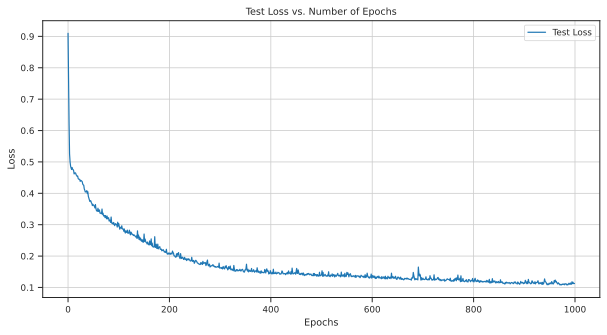

In [ ]:
# Plotting the test loss
plt.figure(figsize=(10, 5))
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

Now plot the observations vs predictions plot for the training data:

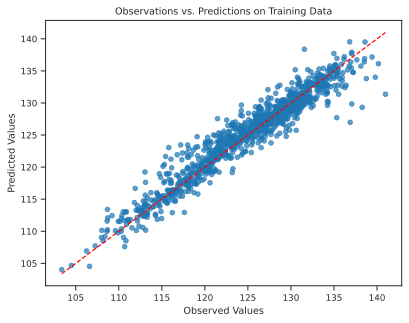

In [ ]:
X_train_tensor = torch.Tensor(X_train)
y_pred_train = model(X_train_tensor)

# Plotting the observations vs predictions
plt.figure()
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observations vs. Predictions on Training Data')
plt.show()


And do the observations vs predictions plot for the test data:

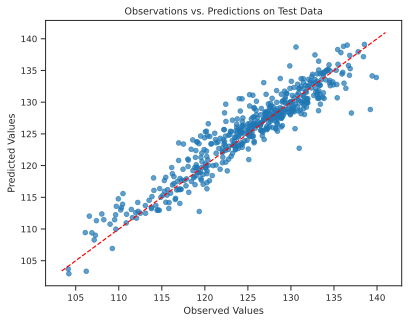

In [ ]:
X_test_tensor = torch.Tensor(X_test)
y_pred_test = model(X_test_tensor)

# Plotting the observations vs predictions
plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observations vs. Predictions on Test Data')
plt.show()

#### Part C.I - Investigate the effect of the batch size

For the given network, try batch sizes of 10, 25, 50, and 100 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Which batch sizes lead to faster training times and why?
Which one would you choose?

**Answer:**

In [ ]:
epochs = 400
lr = 0.01
reg_weight = 1e-12
test_losses = []
models = []
batches = [10, 25, 50, 100] # make me a list with the right batch sizes
for n_batch in batches:
    print('Training n_batch: {0:d}'.format(n_batch))
    net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        reg_weight,
        n_batch,
        epochs,
        lr
    )
    test_losses.append(test_loss)
    models.append(model)

Training n_batch: 10


100%|██████████| 400/400 [01:36<00:00,  4.14it/s]


Training n_batch: 25


100%|██████████| 400/400 [00:47<00:00,  8.37it/s]


Training n_batch: 50


100%|██████████| 400/400 [00:22<00:00, 17.76it/s]


Training n_batch: 100


100%|██████████| 400/400 [00:13<00:00, 29.03it/s]


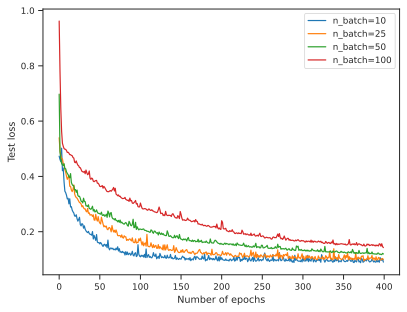

In [ ]:
fig, ax = plt.subplots(dpi=100)
for tl, n_batch in zip(test_losses, batches):
    ax.plot(tl, label='n_batch={0:d}'.format(n_batch))
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.legend(loc='best');

*Write your observsations about the batch size here*
<br>
**Answer**
Larger batch sizes can accelerate training times since hardware such as GPUs performs matrix operations more efficiently with larger matrices parallelizing large vector operations, leading to better utilization of hardware resources.

In contrast, smaller batch sizes tend to slow down training per epoch due to less efficient use of hardware.

Next, I can see model tends to converge faster to a lower test loss value when the batch size is smaller. Smaller batches means that the number of parameter updates per epoch is greater. However choice of the batch size will also depend on how noisy the data look. 25 batch size is a good balance with low loss and low noise if time to train is not a contraint.



#### Part C.II - Investigate the effect of the learning rate

Fix the batch size to the best one you identified in Part C.I.
For the given network, try learning rates of 1, 0.1, 0.01, and 0.001 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Does the algorithm converge for all learning rates?
Which learning rate would you choose?

**Answer:**

Training with learning rate: 1.000


100%|██████████| 400/400 [00:39<00:00, 10.02it/s]


Training with learning rate: 0.100


100%|██████████| 400/400 [00:39<00:00, 10.13it/s]


Training with learning rate: 0.010


100%|██████████| 400/400 [00:44<00:00,  8.92it/s]


Training with learning rate: 0.001


100%|██████████| 400/400 [00:41<00:00,  9.74it/s]


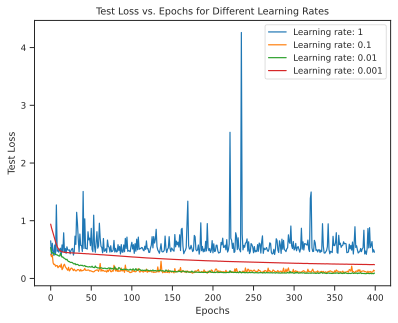

In [ ]:
# Set the parameters
epochs = 400
best_batch_size = 25  # Replace with the balanced batch size identified in Part C.I.
learning_rates = [1, 0.1, 0.01, 0.001]
reg_weight = 1e-12
test_losses_lr = []
models_lr = []

for lr in learning_rates:
    print('Training with learning rate: {0:.3f}'.format(lr))
    net = nn.Sequential(nn.Linear(5, 20),
                        nn.Sigmoid(),
                        nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        reg_weight,
        best_batch_size,
        epochs,
        lr
    )
    test_losses_lr.append(test_loss)
    models_lr.append(model)

# Plotting the test losses for different learning rates
fig, ax = plt.subplots()
for i, lr in enumerate(learning_rates):
    ax.plot(test_losses_lr[i], label=f'Learning rate: {lr}')

ax.set_title('Test Loss vs. Epochs for Different Learning Rates')
ax.set_xlabel('Epochs')
ax.set_ylabel('Test Loss')
ax.legend()
plt.show()


**Answer** <br>
The algorithm doesnt converge for learning rate 1.
<br>
If I look at the training time, all of them have roughly similar training time whereas when it comes to model convergence except lr = 1, all others converges to lower test loss at different amount. I would choose lr of 0.01, since it converges relatively gradually with epoch with least amount of noise and with lowest test loss overall at end of 400 epochs

#### Part C.III - Investigate the effect of the regularization weight

Fix the batch size to the value you selected in C.I and the learning rate to the value you selected in C.II.
For the given network, try regularization weights of 0, 1e-16, 1e-12, 1e-6, and 1e-3 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Which regularization weight seems to be the best and why?

**Answer:**

Training with regularization weight: 0e+00


100%|██████████| 400/400 [00:41<00:00,  9.63it/s]


Training with regularization weight: 1e-16


100%|██████████| 400/400 [00:39<00:00, 10.24it/s]


Training with regularization weight: 1e-12


100%|██████████| 400/400 [00:41<00:00,  9.74it/s]


Training with regularization weight: 1e-06


100%|██████████| 400/400 [00:41<00:00,  9.66it/s]


Training with regularization weight: 1e-03


100%|██████████| 400/400 [00:42<00:00,  9.51it/s]


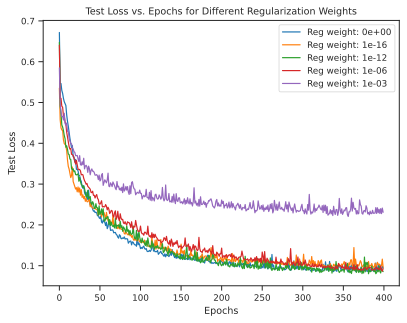

In [ ]:
# Set the parameters
epochs = 400
best_batch_size = 25  # Replace with the reasonable batch size identified in Part C.I.
best_lr = 0.01  # Replace with the best learning rate identified in Part C.II
reg_weights = [0, 1e-16, 1e-12, 1e-6, 1e-3]
test_losses_reg = []
models_reg = []

for reg_weight in reg_weights:
    print('Training with regularization weight: {0:.0e}'.format(reg_weight))
    net = nn.Sequential(nn.Linear(5, 20),
                        nn.Sigmoid(),
                        nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        reg_weight,
        best_batch_size,
        epochs,
        best_lr
    )
    test_losses_reg.append(test_loss)
    models_reg.append(model)

# Plotting the test losses for different regularization weights
fig, ax = plt.subplots()
for i, reg_weight in enumerate(reg_weights):
    ax.plot(test_losses_reg[i], label=f'Reg weight: {reg_weight:.0e}')

ax.set_title('Test Loss vs. Epochs for Different Regularization Weights')
ax.set_xlabel('Epochs')
ax.set_ylabel('Test Loss')
ax.legend()
plt.show()


A high regularization weight reduces overfitting but can lead to underfitting if too strong, while a low regularization weight allows for more complex models but can increase the risk of overfitting. Out of all Reg weight used, I best may be 1e-16 since it shows low loss with lower noise.

#### Part D.I - Train a bigger network

You have developed some intuition about the parameters involved in training a network. Now, let's train a larger one.
In particular, use a 5-layer deep network with 100 neurons per layer.
You can use the sigmoid activation function, or you can change it to something else.
Make sure you plot:
- the evolution of the test loss as a function of the epochs
- the observations vs predictions plot for the test data

**Answer:**

100%|██████████| 400/400 [01:30<00:00,  4.43it/s]


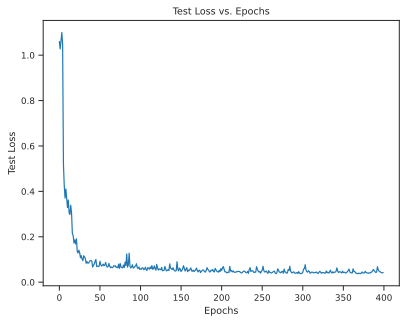

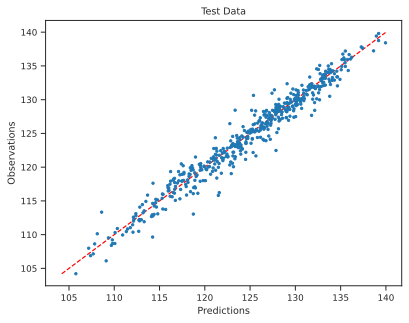

In [ ]:

# Define the larger network
class DeepNetwork(nn.Module):
    def __init__(self):
        super(DeepNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(5, 100),
            nn.Sigmoid(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            nn.Linear(100, 100),
            nn.Sigmoid(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Set the parameters
epochs = 400
best_batch_size = 25  # Replace with the best batch size identified in Part C.I.
best_lr = 0.01  # Replace with the best learning rate identified in Part C.II
reg_weight = 1e-16  # Replace with the best regularization weight identified in Part C.III

# Instantiate and train the larger network
net = DeepNetwork()
model, test_loss, X_train, y_train, X_test, y_test = train_net(
    X, y, net, reg_weight, best_batch_size, epochs, best_lr
)

# Plot the evolution of the test loss as a function of the epochs
fig, ax = plt.subplots()
ax.plot(test_loss)
ax.set_title('Test Loss vs. Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Test Loss')
plt.show()

# Plot observations vs predictions for the test data
fig, ax = plt.subplots()
X_test_tensor = torch.Tensor(X_test)
y_pred_test = model(X_test_tensor)
y_min = np.min(np.concatenate([y_pred_test, y_test]))
y_max = np.max(np.concatenate([y_pred_test, y_test]))
ax.plot([y_min, y_max], [y_min, y_max], 'r--')
ax.plot(y_pred_test, y_test, '.')
ax.set_title('Test Data')
ax.set_xlabel('Predictions')
ax.set_ylabel('Observations')
plt.show()


#### Part D.II - Make a prediction

Visualize the scaled sound level as a function of the stream velocity for a fixed frequency of 2500 Hz, a chord length of 0.1 m, a suction side displacement thickness of 0.01 m, and an angle of attack of 0, 5, and 10 degrees.

**Answer:**

This is just a check for your model.
You will have to run the following code segments for the best model you have found.

In [ ]:
best_model = model # set this equal to your best model

def plot_sound_level_as_func_of_stream_vel(
    freq=2500,
    angle_of_attack=10,
    chord_length=0.1,
    suc_side_disp_thick=0.01,
    ax=None,
    label=None
):

    if ax is None:
        fig, ax = plt.subplots(dpi=100)

    # The velocities on which we want to evaluate the model
    vel = np.linspace(X[:, 3].min(), X[:, 3].max(), 100)[:, None]

    # Make the input for the model
    freqs = freq * np.ones(vel.shape)
    angles = angle_of_attack * np.ones(vel.shape)
    chords = chord_length * np.ones(vel.shape)
    sucs = suc_side_disp_thick * np.ones(vel.shape)

    # Put all these into a single array
    XX = np.hstack([freqs, angles, chords, vel, sucs])

    ax.plot(vel, best_model(XX), label=label)

    ax.set_xlabel('Velocity (m/s)')
    ax.set_ylabel('Scaled sound pressure level (decibels)')

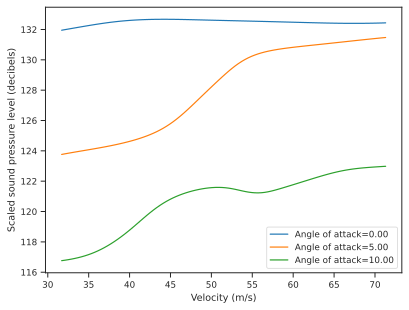

In [ ]:
fig, ax = plt.subplots(dpi=100)
for aofa in [0, 5, 10]:
    plot_sound_level_as_func_of_stream_vel(
        angle_of_attack=aofa,
        ax=ax,
        label='Angle of attack={0:1.2f}'.format(aofa)
)
plt.legend(loc='best');

## Problem 2 - Classification with DNNs

[Dr. Ali Lenjani](https://scholar.google.com/citations?user=vVPC7g0AAAAJ&hl=en) kindly provided this homework problem.
It is based on our joint work on this paper:
[Hierarchical convolutional neural networks information fusion for activity source detection in smart buildings](http://www.dpi-proceedings.com/index.php/shm2019/article/view/32353).
The data come from the [Human Activity Benchmark](http://www.ce.sc.edu/#/caicedo/custom?title=Human%20Activity%20Benchmark) published by Dr. Juan M. Caicedo.

So the problem is as follows.
You want to put sensors on a building so that it can figure out what is going on inside it.
This has applications in industrial facilities (e.g., detecting if there was an accident), public infrastructure, hospitals (e.g., did a patient fall off a bed), etc.
Typically, the problem is addressed using cameras.
Instead of cameras, we will investigate the ability of acceleration sensors to tell us what is going on.

Four acceleration sensors have been placed in different locations in the benchmark building to record the floor vibration signals of other objects falling from several heights.
A total of seven cases cases were considered:

- **bag-high:** 450 g bag containing plastic pieces is dropped roughly from 2.10 m
- **bag-low:** 450 g bag containing plastic pieces is dropped roughly from 1.45 m
- **ball-high:** 560 g basketball is dropped roughly from 2.10 m
- **ball-low:** 560 g basketball is dropped roughly from 1.45 m
- **j-jump:** person 1.60 m tall, 55 kg jumps approximately 12 cm high
- **d-jump:** person 1.77 m tall, 80 kg jumps approximately 12 cm high
- **w-jump:** person 1.85 m tall, 85 kg jumps approximately 12 cm high

Each of these seven cases was repeated 115 times at five different building locations.
The original data are [here](http://www.ce.sc.edu/#/caicedo/custom?title=Human%20Activity%20Benchmark), but I have repackaged them for you in a more convenient format.
Let's download them:

In [ ]:
!curl -O 'https://dl.dropboxusercontent.com/s/n8dczk7t8bx0pxi/human_activity_data.npz'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  203M  100  203M    0     0  59.7M      0  0:00:03  0:00:03 --:--:-- 59.7M


Here is how to load the data:

In [ ]:
data = np.load('human_activity_data.npz')

This is a Python dictionary that contains the following entries:

In [ ]:
for key in data.keys():
    print(key, ':', data[key].shape)

features : (4025, 4, 3305)
labels_1 : (4025,)
labels_2 : (4025,)
loc_ids : (4025,)


Let's go over these one by one. First, the `features`.
These are the accelertion sensor measurements.
Here is how you visualize them:

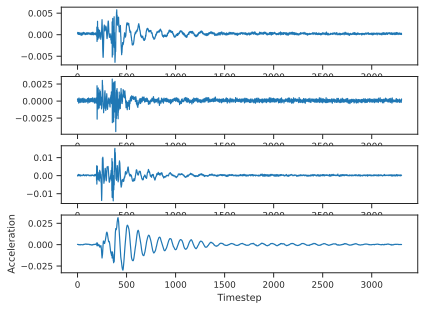

In [ ]:
fig, ax = plt.subplots(4, 1, dpi=100)
# Loop over sensors
for j in range(4):
        ax[j].plot(data['features'][0, j])
ax[-1].set_xlabel('Timestep')
ax[-1].set_ylabel('Acceleration');

The second key, `labels_1`, is a bunch of integers ranging from 0 to 2 indicating whether the entry corresponds to a "bag," a "ball" or a "jump."
For your reference, the correspondence is:

In [ ]:
LABELS_1_TO_TEXT = {
    0: 'bag',
    1: 'ball',
    2: 'jump'
}

And here are a few examples:

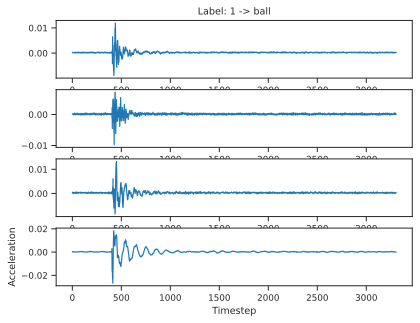

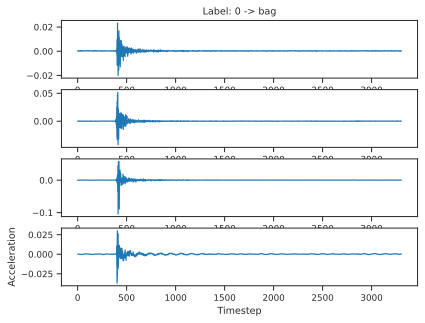

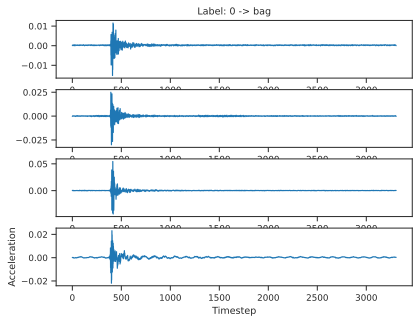

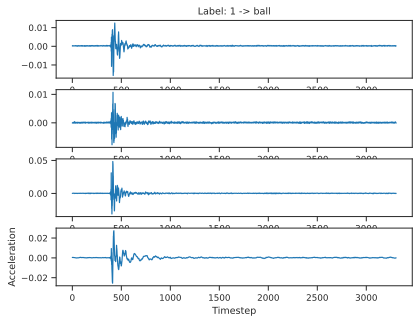

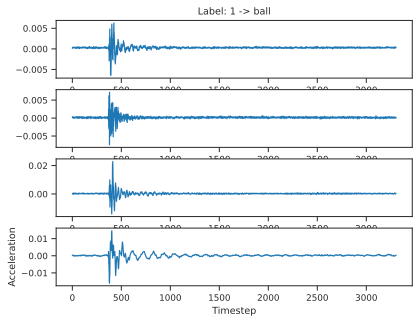

In [ ]:
for _ in range(5):
    i = np.random.randint(0, data['features'].shape[0])
    fig, ax = plt.subplots(4, 1, dpi=100)
    for j in range(4):
        ax[j].plot(data['features'][i, j])
    ax[-1].set_xlabel('Timestep')
    ax[-1].set_ylabel('Acceleration')
    ax[0].set_title('Label: {0:d} -> {1:s}'.format(data['labels_1'][i],
                                                   LABELS_1_TO_TEXT[data['labels_1'][i]]))

The array `labels_2` includes integers from 0 to 6 indicating the detailed label of the experiment. The correspondence between integers and text labels is:

In [ ]:
LABELS_2_TO_TEXT = {
    0: 'bag-high',
    1: 'bag-low',
    2: 'ball-high',
    3: 'ball-low',
    4: 'd-jump',
    5: 'j-jump',
    6: 'w-jump'
}

Finally, the field `loc_ids` takes values from 0 to 4 indicating five distinct locations in the building.

Before moving forward with the questions, let's extract the data in a more covenient form:

In [ ]:
# The features
X = data['features']
# The labels_1
y1 = data['labels_1']
# The labels_2
y2 = data['labels_2']
# The locations
y3 = data['loc_ids']

### Part A - Train a CNN to predict the high-level type of observation (bag, ball, or jump)

Fill in the blanks in the code blocks below to train a classification neural network that will take you from the four acceleration sensor data to the high-level type of each observation.
You can keep the network structure fixed, but you can experiment with the learning rate, the number of epochs, or anything else.
Just keep in mind that for this particular dataset, it is possible to hit an accuracy of almost 100%.

**Answer:**

The first thing that we need to do is pick a neural network structure.
Let's use 1D convolutional layers at the very beginning.
These are the same as the 2D (image) convolutional layers but in 1D.
The reason I am proposing this is that the convolutional layers are invariant to small translations of the acceleration signal (just like the labels are).
Here is what I propose:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, num_labels=3):
        super(Net, self).__init__()
        # A convolutional layer:
        # 3 = input channels (sensors),
        # 6 = output channels (features),
        # 5 = kernel size
        self.conv1 = nn.Conv1d(4, 8, 10)
        # A 2 x 2 max pooling layer - we are going to use it two times
        self.pool = nn.MaxPool1d(5)
        # Another convolutional layer
        self.conv2 = nn.Conv1d(8, 16, 5)
        # Some linear layers
        self.fc1 = nn.Linear(16 * 131, 200)
        self.fc2 = nn.Linear(200, 50)
        self.fc3 = nn.Linear(50, num_labels)

    def forward(self, x):
        # This function implements your network output
        # Convolutional layer, followed by relu, followed by max pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Same thing
        x = self.pool(F.relu(self.conv2(x)))
        # Flatting the output of the convolutional layers
        x = x.view(-1, 16 * 131)
        # Go throught the first dense linear layer followed by relu
        x = F.relu(self.fc1(x))
        # Through the second dense layer
        x = F.relu(self.fc2(x))
        # Finish up with a linear transformation
        x = self.fc3(x)
        return x

In [ ]:
# You can make the network like this:
net = Net(3)

Now, you need to pick the right loss function for classification tasks:

In [ ]:
cnn_loss_func = nn.CrossEntropyLoss()

Just like before, let's organize our training code in a convenient function that allows us to play with the parameters of training.
Fill in the missing code.

In [ ]:
# Import tqdm library
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch.optim as optim
def train_cnn(X, y, net, n_batch, epochs, lr, test_size=0.33):
    """
    A function that trains a regression neural network using stochastic gradient
    descent and returns the trained network. The loss function being minimized is
    `loss_func`.

    Parameters:

    X          -    The observed features
    y          -    The observed targets
    net        -    The network you want to fit
    n_batch    -    The batch size you want to use for stochastic optimization
    epochs     -    How many times do you want to pass over the training dataset.
    lr         -    The learning rate for the stochastic optimization algorithm.
    test_size  -    What percentage of the data should be used for testing (validation).
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Turn all the numpy arrays to torch tensors
    X_train = torch.Tensor(X_train)
    X_test = torch.Tensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)

    # This is pytorch magick to enable shuffling of the training data every time we go through them
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_data_loader = torch.utils.data.DataLoader(train_dataset,
                                                    batch_size=n_batch,
                                                    shuffle=True)

    # Create an Adam optimizing object for the neural network `net` with learning rate `lr`
    # raise NotImplementedError('Define the optimizer object! Delete me then!')
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    # This is a place to keep track of the test loss
    test_loss = []
    # This is a place to keep track of the accuracy on each epoch
    accuracy = []

    # Iterate the optimizer.
    # Remember, each time we go through the entire dataset we complete an `epoch`
    # I have wrapped the range around tqdm to give you a nice progress bar
    # to look at
    for e in tqdm(range(epochs), desc="Training Epochs"):

        # This loop goes over all the shuffled training data
        # That's why the DataLoader class of PyTorch is convenient
        for X_batch, y_batch in train_data_loader:
            # Perform a single optimization step with loss function
            # cnn_loss_func(y_batch, y_pred, reg_weight)
            # Hint 1: You have defined cnn_loss_func() already
            # Hint 2: Consult the hands-on activities for an example

            optimizer.zero_grad()
            y_pred = net(X_batch)
            loss = cnn_loss_func(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            # raise NotImplementedError('Write stochastic gradient step code! Delete me then!')

        # Evaluate the test loss and append it on the list `test_loss`
        y_pred_test = net(X_test)
        ts_loss = cnn_loss_func(y_pred_test, y_test)
        test_loss.append(ts_loss.item())
        # Evaluate the accuracy
        _, predicted = torch.max(y_pred_test.data, 1)
        correct = (predicted == y_test).sum().item()
        accuracy.append(correct / y_test.shape[0])
        # Print something about the accuracy
        print(f'For Epoch {e+1}: accuracy = {accuracy[-1]:1.5f} and test loss = {ts_loss.item()}')

    trained_model = net

    # Return everything we need to analyze the results
    return trained_model, test_loss, accuracy, X_train, y_train, X_test, y_test

Now experiment with the epochs, the learning rate, and the batch size until this works.

In [ ]:
epochs = 50
lr = 0.001
n_batch = 25
trained_model, test_loss, accuracy, X_train, y_train, X_test, y_test = train_cnn(X, y1, net, n_batch, epochs, lr)

Training Epochs:   2%|▏         | 1/50 [00:04<03:53,  4.76s/it]

For Epoch 1: accuracy = 0.41159 and test loss = 1.074583649635315


Training Epochs:   4%|▍         | 2/50 [00:10<04:10,  5.22s/it]

For Epoch 2: accuracy = 0.96840 and test loss = 0.24369436502456665


Training Epochs:   6%|▌         | 3/50 [00:14<03:43,  4.75s/it]

For Epoch 3: accuracy = 0.95937 and test loss = 0.1422325074672699


Training Epochs:   8%|▊         | 4/50 [00:18<03:23,  4.43s/it]

For Epoch 4: accuracy = 0.98495 and test loss = 0.05980473384261131


Training Epochs:  10%|█         | 5/50 [00:23<03:30,  4.69s/it]

For Epoch 5: accuracy = 0.98721 and test loss = 0.05057227239012718


Training Epochs:  12%|█▏        | 6/50 [00:28<03:22,  4.61s/it]

For Epoch 6: accuracy = 0.99248 and test loss = 0.032956283539533615


Training Epochs:  14%|█▍        | 7/50 [00:32<03:19,  4.64s/it]

For Epoch 7: accuracy = 0.99248 and test loss = 0.026120098307728767


Training Epochs:  16%|█▌        | 8/50 [00:38<03:28,  4.97s/it]

For Epoch 8: accuracy = 0.99323 and test loss = 0.038335949182510376


Training Epochs:  18%|█▊        | 9/50 [00:42<03:18,  4.85s/it]

For Epoch 9: accuracy = 0.99624 and test loss = 0.017668599262833595


Training Epochs:  20%|██        | 10/50 [00:47<03:09,  4.75s/it]

For Epoch 10: accuracy = 0.99699 and test loss = 0.013024957850575447


Training Epochs:  22%|██▏       | 11/50 [00:52<03:11,  4.92s/it]

For Epoch 11: accuracy = 0.99549 and test loss = 0.014402689412236214


Training Epochs:  24%|██▍       | 12/50 [00:57<02:59,  4.72s/it]

For Epoch 12: accuracy = 0.99774 and test loss = 0.009827164933085442


Training Epochs:  26%|██▌       | 13/50 [01:01<02:49,  4.58s/it]

For Epoch 13: accuracy = 0.99850 and test loss = 0.00804865825921297


Training Epochs:  28%|██▊       | 14/50 [01:06<02:52,  4.79s/it]

For Epoch 14: accuracy = 0.99850 and test loss = 0.0073429737240076065


Training Epochs:  30%|███       | 15/50 [01:11<02:44,  4.69s/it]

For Epoch 15: accuracy = 0.99925 and test loss = 0.009029310196638107


Training Epochs:  32%|███▏      | 16/50 [01:15<02:34,  4.53s/it]

For Epoch 16: accuracy = 0.99925 and test loss = 0.00720980204641819


Training Epochs:  34%|███▍      | 17/50 [01:20<02:39,  4.84s/it]

For Epoch 17: accuracy = 0.99925 and test loss = 0.007121637929230928


Training Epochs:  36%|███▌      | 18/50 [01:25<02:31,  4.73s/it]

For Epoch 18: accuracy = 0.99925 and test loss = 0.006996700074523687


Training Epochs:  38%|███▊      | 19/50 [01:29<02:20,  4.52s/it]

For Epoch 19: accuracy = 0.99925 and test loss = 0.006748012267053127


Training Epochs:  40%|████      | 20/50 [01:34<02:22,  4.76s/it]

For Epoch 20: accuracy = 0.99925 and test loss = 0.006932705640792847


Training Epochs:  42%|████▏     | 21/50 [01:38<02:13,  4.61s/it]

For Epoch 21: accuracy = 0.99473 and test loss = 0.019772134721279144


Training Epochs:  44%|████▍     | 22/50 [01:42<02:04,  4.44s/it]

For Epoch 22: accuracy = 0.99850 and test loss = 0.009520648047327995


Training Epochs:  46%|████▌     | 23/50 [01:49<02:14,  4.97s/it]

For Epoch 23: accuracy = 0.99925 and test loss = 0.006913342047482729


Training Epochs:  48%|████▊     | 24/50 [01:53<02:07,  4.90s/it]

For Epoch 24: accuracy = 0.99925 and test loss = 0.00786688644438982


Training Epochs:  50%|█████     | 25/50 [01:58<02:01,  4.84s/it]

For Epoch 25: accuracy = 0.99925 and test loss = 0.006707640830427408


Training Epochs:  52%|█████▏    | 26/50 [02:03<02:00,  5.01s/it]

For Epoch 26: accuracy = 0.99925 and test loss = 0.00713020795956254


Training Epochs:  54%|█████▍    | 27/50 [02:08<01:51,  4.83s/it]

For Epoch 27: accuracy = 0.99925 and test loss = 0.007226064335554838


Training Epochs:  56%|█████▌    | 28/50 [02:13<01:47,  4.90s/it]

For Epoch 28: accuracy = 0.99925 and test loss = 0.006643433123826981


Training Epochs:  58%|█████▊    | 29/50 [02:18<01:44,  4.95s/it]

For Epoch 29: accuracy = 0.99925 and test loss = 0.007517879828810692


Training Epochs:  60%|██████    | 30/50 [02:23<01:38,  4.91s/it]

For Epoch 30: accuracy = 0.99925 and test loss = 0.006990933790802956


Training Epochs:  62%|██████▏   | 31/50 [02:28<01:35,  5.02s/it]

For Epoch 31: accuracy = 0.99925 and test loss = 0.007378874346613884


Training Epochs:  64%|██████▍   | 32/50 [02:33<01:28,  4.92s/it]

For Epoch 32: accuracy = 0.99925 and test loss = 0.007403158582746983


Training Epochs:  66%|██████▌   | 33/50 [02:37<01:21,  4.80s/it]

For Epoch 33: accuracy = 0.99925 and test loss = 0.007861867547035217


Training Epochs:  68%|██████▊   | 34/50 [02:43<01:20,  5.03s/it]

For Epoch 34: accuracy = 0.99925 and test loss = 0.007355401758104563


Training Epochs:  70%|███████   | 35/50 [02:47<01:13,  4.90s/it]

For Epoch 35: accuracy = 0.99925 and test loss = 0.007702099625021219


Training Epochs:  72%|███████▏  | 36/50 [02:52<01:06,  4.79s/it]

For Epoch 36: accuracy = 0.99925 and test loss = 0.00769296009093523


Training Epochs:  74%|███████▍  | 37/50 [02:58<01:04,  5.00s/it]

For Epoch 37: accuracy = 0.99925 and test loss = 0.007802471052855253


Training Epochs:  76%|███████▌  | 38/50 [03:02<00:59,  4.93s/it]

For Epoch 38: accuracy = 0.99925 and test loss = 0.007636150810867548


Training Epochs:  78%|███████▊  | 39/50 [03:08<00:55,  5.08s/it]

For Epoch 39: accuracy = 0.99925 and test loss = 0.007654157001525164


Training Epochs:  80%|████████  | 40/50 [03:13<00:51,  5.15s/it]

For Epoch 40: accuracy = 0.99925 and test loss = 0.008083767257630825


Training Epochs:  82%|████████▏ | 41/50 [03:18<00:44,  4.97s/it]

For Epoch 41: accuracy = 0.99925 and test loss = 0.008026696741580963


Training Epochs:  84%|████████▍ | 42/50 [03:23<00:41,  5.25s/it]

For Epoch 42: accuracy = 0.99925 and test loss = 0.007925701327621937


Training Epochs:  86%|████████▌ | 43/50 [03:28<00:35,  5.08s/it]

For Epoch 43: accuracy = 0.99925 and test loss = 0.008077847771346569


Training Epochs:  88%|████████▊ | 44/50 [03:33<00:30,  5.06s/it]

For Epoch 44: accuracy = 0.99925 and test loss = 0.008088589645922184


Training Epochs:  90%|█████████ | 45/50 [03:39<00:26,  5.31s/it]

For Epoch 45: accuracy = 0.99925 and test loss = 0.008344288915395737


Training Epochs:  92%|█████████▏| 46/50 [03:44<00:20,  5.22s/it]

For Epoch 46: accuracy = 0.99925 and test loss = 0.008505703881382942


Training Epochs:  94%|█████████▍| 47/50 [03:50<00:16,  5.45s/it]

For Epoch 47: accuracy = 0.99925 and test loss = 0.008546587079763412


Training Epochs:  96%|█████████▌| 48/50 [03:55<00:10,  5.34s/it]

For Epoch 48: accuracy = 0.99925 and test loss = 0.008631754666566849


Training Epochs:  98%|█████████▊| 49/50 [04:00<00:05,  5.30s/it]

For Epoch 49: accuracy = 0.99925 and test loss = 0.008562799543142319


Training Epochs: 100%|██████████| 50/50 [04:07<00:00,  4.95s/it]

For Epoch 50: accuracy = 0.99925 and test loss = 0.008660721592605114


Plot the evolution of the test loss as a function of epochs.

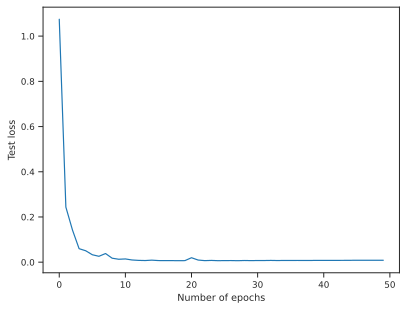

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(test_loss)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss');

Plot the evolution of the accuracy as a function of epochs.

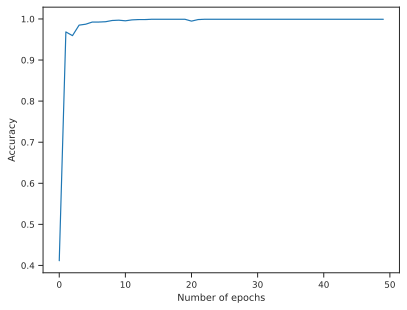

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(accuracy)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Accuracy');

Plot the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
# Predict on the test data
y_pred_test = trained_model(X_test)
# Remember that the prediction is probabilistic
# We need to simply pick the label with the highest probability:
_, y_pred_labels = torch.max(y_pred_test, 1)
# Here is the confusion matrix:
cf_matrix = confusion_matrix(y_test, y_pred_labels)

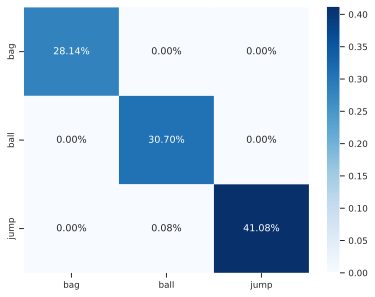

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues',
            xticklabels=LABELS_1_TO_TEXT.values(),
            yticklabels=LABELS_1_TO_TEXT.values());

### Part B - Train a CNN to predict the the low-level type of observation (bag-high, bag-low, etc.)

Repeat what you did above for `y2`.

**Answer:**

In [ ]:
# Import tqdm library
from tqdm import tqdm

def train_cnn(X, y, net, n_batch, epochs, lr, test_size=0.33):
    """
    A function that trains a regression neural network using stochastic gradient
    descent and returns the trained network. The loss function being minimized is
    `loss_func`.

    Parameters:

    X          -    The observed features
    y          -    The observed targets
    net        -    The network you want to fit
    n_batch    -    The batch size you want to use for stochastic optimization
    epochs     -    How many times do you want to pass over the training dataset.
    lr         -    The learning rate for the stochastic optimization algorithm.
    test_size  -    What percentage of the data should be used for testing (validation).
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Turn all the numpy arrays to torch tensors
    X_train = torch.Tensor(X_train)
    X_test = torch.Tensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)

    # This is pytorch magick to enable shuffling of the training data every time we go through them
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_data_loader = torch.utils.data.DataLoader(train_dataset,
                                                    batch_size=n_batch,
                                                    shuffle=True)

    # Create an Adam optimizing object for the neural network `net` with learning rate `lr`
    # raise NotImplementedError('Define the optimizer object! Delete me then!')
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    # This is a place to keep track of the test loss
    test_loss = []
    # This is a place to keep track of the accuracy on each epoch
    accuracy = []

    # Iterate the optimizer.
    # Remember, each time we go through the entire dataset we complete an `epoch`
    # I have wrapped the range around tqdm to give you a nice progress bar
    # to look at
    for e in tqdm(range(epochs), desc="Training Epochs"):

        # This loop goes over all the shuffled training data
        # That's why the DataLoader class of PyTorch is convenient
        for X_batch, y_batch in train_data_loader:
            # Perform a single optimization step with loss function
            # cnn_loss_func(y_batch, y_pred, reg_weight)
            # Hint 1: You have defined cnn_loss_func() already
            # Hint 2: Consult the hands-on activities for an example

            optimizer.zero_grad()
            y_pred = net(X_batch)
            loss = cnn_loss_func(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            # raise NotImplementedError('Write stochastic gradient step code! Delete me then!')

        # Evaluate the test loss and append it on the list `test_loss`
        y_pred_test = net(X_test)
        ts_loss = cnn_loss_func(y_pred_test, y_test)
        test_loss.append(ts_loss.item())
        # Evaluate the accuracy
        _, predicted = torch.max(y_pred_test.data, 1)
        correct = (predicted == y_test).sum().item()
        accuracy.append(correct / y_test.shape[0])
        # Print something about the accuracy
        # print('Epoch {0:d}: accuracy = {1:1.5f}%'.format(e+1, accuracy[-1]))
        print(f'Epoch {e+1}: accuracy = {accuracy[-1]:1.5f}, test loss = {ts_loss.item()}')

    trained_model = net

    # Return everything we need to analyze the results
    return trained_model, test_loss, accuracy, X_train, y_train, X_test, y_test

In [ ]:
from sklearn.model_selection import train_test_split
net = Net(7)



epochs = 150
lr = 0.001
n_batch = 30

trained_model, test_loss, accuracy1, X_train, y_train, X_test, y_test = train_cnn(
    X, y2, net, n_batch, epochs, lr
)

Training Epochs:   1%|          | 1/150 [00:04<10:58,  4.42s/it]

Epoch 1: accuracy = 0.13017, test loss = 1.9490432739257812


Training Epochs:   1%|▏         | 2/150 [00:08<10:47,  4.37s/it]

Epoch 2: accuracy = 0.23476, test loss = 1.8433424234390259


Training Epochs:   2%|▏         | 3/150 [00:12<10:09,  4.15s/it]

Epoch 3: accuracy = 0.45598, test loss = 1.160392165184021


Training Epochs:   3%|▎         | 4/150 [00:17<11:05,  4.56s/it]

Epoch 4: accuracy = 0.50113, test loss = 0.9843704700469971


Training Epochs:   3%|▎         | 5/150 [00:21<10:18,  4.27s/it]

Epoch 5: accuracy = 0.57261, test loss = 0.8833242058753967


Training Epochs:   4%|▍         | 6/150 [00:25<09:57,  4.15s/it]

Epoch 6: accuracy = 0.57186, test loss = 0.8420186042785645


Training Epochs:   5%|▍         | 7/150 [00:30<10:29,  4.40s/it]

Epoch 7: accuracy = 0.61550, test loss = 0.7918709516525269


Training Epochs:   5%|▌         | 8/150 [00:34<10:10,  4.30s/it]

Epoch 8: accuracy = 0.66516, test loss = 0.7369841933250427


Training Epochs:   6%|▌         | 9/150 [00:38<09:53,  4.21s/it]

Epoch 9: accuracy = 0.75169, test loss = 0.6369117498397827


Training Epochs:   7%|▋         | 10/150 [00:43<10:35,  4.54s/it]

Epoch 10: accuracy = 0.75546, test loss = 0.5700991153717041


Training Epochs:   7%|▋         | 11/150 [00:48<10:20,  4.46s/it]

Epoch 11: accuracy = 0.80587, test loss = 0.4887806475162506


Training Epochs:   8%|▊         | 12/150 [00:52<09:59,  4.35s/it]

Epoch 12: accuracy = 0.78856, test loss = 0.4593909978866577


Training Epochs:   9%|▊         | 13/150 [00:57<10:27,  4.58s/it]

Epoch 13: accuracy = 0.80361, test loss = 0.4215092062950134


Training Epochs:   9%|▉         | 14/150 [01:01<10:16,  4.53s/it]

Epoch 14: accuracy = 0.80135, test loss = 0.4032306969165802


Training Epochs:  10%|█         | 15/150 [01:06<10:05,  4.48s/it]

Epoch 15: accuracy = 0.81716, test loss = 0.38733768463134766


Training Epochs:  11%|█         | 16/150 [01:11<10:34,  4.73s/it]

Epoch 16: accuracy = 0.81415, test loss = 0.38910627365112305


Training Epochs:  11%|█▏        | 17/150 [01:15<10:14,  4.62s/it]

Epoch 17: accuracy = 0.81189, test loss = 0.3784775733947754


Training Epochs:  12%|█▏        | 18/150 [01:19<09:52,  4.49s/it]

Epoch 18: accuracy = 0.84123, test loss = 0.3285745680332184


Training Epochs:  13%|█▎        | 19/150 [01:25<10:10,  4.66s/it]

Epoch 19: accuracy = 0.82393, test loss = 0.33947160840034485


Training Epochs:  13%|█▎        | 20/150 [01:29<09:41,  4.47s/it]

Epoch 20: accuracy = 0.83973, test loss = 0.3275451064109802


Training Epochs:  14%|█▍        | 21/150 [01:33<09:23,  4.37s/it]

Epoch 21: accuracy = 0.82995, test loss = 0.34403911232948303


Training Epochs:  15%|█▍        | 22/150 [01:38<09:56,  4.66s/it]

Epoch 22: accuracy = 0.85854, test loss = 0.28961995244026184


Training Epochs:  15%|█▌        | 23/150 [01:42<09:27,  4.47s/it]

Epoch 23: accuracy = 0.84199, test loss = 0.31182950735092163


Training Epochs:  16%|█▌        | 24/150 [01:46<09:10,  4.37s/it]

Epoch 24: accuracy = 0.83672, test loss = 0.2916109263896942


Training Epochs:  17%|█▋        | 25/150 [01:51<09:18,  4.46s/it]

Epoch 25: accuracy = 0.85102, test loss = 0.30456775426864624


Training Epochs:  17%|█▋        | 26/150 [01:55<09:08,  4.43s/it]

Epoch 26: accuracy = 0.85403, test loss = 0.2753809094429016


Training Epochs:  18%|█▊        | 27/150 [01:59<08:56,  4.36s/it]

Epoch 27: accuracy = 0.84500, test loss = 0.2917875051498413


Training Epochs:  19%|█▊        | 28/150 [02:07<11:03,  5.44s/it]

Epoch 28: accuracy = 0.85779, test loss = 0.2770163416862488


Training Epochs:  19%|█▉        | 29/150 [02:13<11:12,  5.56s/it]

Epoch 29: accuracy = 0.86080, test loss = 0.2715403437614441


Training Epochs:  20%|██        | 30/150 [02:18<10:41,  5.35s/it]

Epoch 30: accuracy = 0.86757, test loss = 0.2694355547428131


Training Epochs:  21%|██        | 31/150 [02:23<10:10,  5.13s/it]

Epoch 31: accuracy = 0.85403, test loss = 0.2803429663181305


Training Epochs:  21%|██▏       | 32/150 [02:27<09:36,  4.88s/it]

Epoch 32: accuracy = 0.83822, test loss = 0.31481078267097473


Training Epochs:  22%|██▏       | 33/150 [02:32<09:53,  5.07s/it]

Epoch 33: accuracy = 0.86230, test loss = 0.2657245099544525


Training Epochs:  23%|██▎       | 34/150 [02:38<10:01,  5.18s/it]

Epoch 34: accuracy = 0.86682, test loss = 0.25107330083847046


Training Epochs:  23%|██▎       | 35/150 [02:42<09:23,  4.90s/it]

Epoch 35: accuracy = 0.84575, test loss = 0.26556673645973206


Training Epochs:  24%|██▍       | 36/150 [02:46<08:57,  4.72s/it]

Epoch 36: accuracy = 0.85177, test loss = 0.30457603931427


Training Epochs:  25%|██▍       | 37/150 [02:51<08:56,  4.75s/it]

Epoch 37: accuracy = 0.86983, test loss = 0.2497568428516388


Training Epochs:  25%|██▌       | 38/150 [02:55<08:20,  4.47s/it]

Epoch 38: accuracy = 0.86757, test loss = 0.25214117765426636


Training Epochs:  26%|██▌       | 39/150 [02:59<08:07,  4.39s/it]

Epoch 39: accuracy = 0.86682, test loss = 0.2595001757144928


Training Epochs:  27%|██▋       | 40/150 [03:04<08:26,  4.60s/it]

Epoch 40: accuracy = 0.83973, test loss = 0.33412447571754456


Training Epochs:  27%|██▋       | 41/150 [03:09<08:11,  4.51s/it]

Epoch 41: accuracy = 0.87058, test loss = 0.2659846246242523


Training Epochs:  28%|██▊       | 42/150 [03:13<08:03,  4.48s/it]

Epoch 42: accuracy = 0.86080, test loss = 0.26510658860206604


Training Epochs:  29%|██▊       | 43/150 [03:18<08:05,  4.54s/it]

Epoch 43: accuracy = 0.87133, test loss = 0.2501363158226013


Training Epochs:  29%|██▉       | 44/150 [03:22<07:48,  4.42s/it]

Epoch 44: accuracy = 0.86305, test loss = 0.26824817061424255


Training Epochs:  30%|███       | 45/150 [03:26<07:37,  4.36s/it]

Epoch 45: accuracy = 0.86606, test loss = 0.26160815358161926


Training Epochs:  31%|███       | 46/150 [03:31<08:04,  4.66s/it]

Epoch 46: accuracy = 0.87660, test loss = 0.23757119476795197


Training Epochs:  31%|███▏      | 47/150 [03:36<07:47,  4.54s/it]

Epoch 47: accuracy = 0.87810, test loss = 0.23834972083568573


Training Epochs:  32%|███▏      | 48/150 [03:40<07:40,  4.51s/it]

Epoch 48: accuracy = 0.87810, test loss = 0.23308464884757996


Training Epochs:  33%|███▎      | 49/150 [03:45<07:46,  4.62s/it]

Epoch 49: accuracy = 0.87886, test loss = 0.22637519240379333


Training Epochs:  33%|███▎      | 50/150 [03:49<07:29,  4.50s/it]

Epoch 50: accuracy = 0.84801, test loss = 0.29364117980003357


Training Epochs:  34%|███▍      | 51/150 [03:53<07:06,  4.31s/it]

Epoch 51: accuracy = 0.87961, test loss = 0.23050640523433685


Training Epochs:  35%|███▍      | 52/150 [03:58<07:18,  4.48s/it]

Epoch 52: accuracy = 0.88939, test loss = 0.2332652509212494


Training Epochs:  35%|███▌      | 53/150 [04:02<06:55,  4.28s/it]

Epoch 53: accuracy = 0.88713, test loss = 0.22761426866054535


Training Epochs:  36%|███▌      | 54/150 [04:06<06:50,  4.27s/it]

Epoch 54: accuracy = 0.88488, test loss = 0.23005877435207367


Training Epochs:  37%|███▋      | 55/150 [04:13<08:07,  5.13s/it]

Epoch 55: accuracy = 0.87284, test loss = 0.24325188994407654


Training Epochs:  37%|███▋      | 56/150 [04:20<08:48,  5.62s/it]

Epoch 56: accuracy = 0.90293, test loss = 0.21370121836662292


Training Epochs:  38%|███▊      | 57/150 [04:28<09:51,  6.36s/it]

Epoch 57: accuracy = 0.87810, test loss = 0.2513370215892792


Training Epochs:  39%|███▊      | 58/150 [04:34<09:33,  6.23s/it]

Epoch 58: accuracy = 0.89014, test loss = 0.22514133155345917


Training Epochs:  39%|███▉      | 59/150 [04:40<09:07,  6.01s/it]

Epoch 59: accuracy = 0.89767, test loss = 0.21300341188907623


Training Epochs:  40%|████      | 60/150 [04:44<08:09,  5.44s/it]

Epoch 60: accuracy = 0.88111, test loss = 0.24252328276634216


Training Epochs:  41%|████      | 61/150 [04:48<07:29,  5.05s/it]

Epoch 61: accuracy = 0.90143, test loss = 0.22006413340568542


Training Epochs:  41%|████▏     | 62/150 [04:53<07:24,  5.05s/it]

Epoch 62: accuracy = 0.89992, test loss = 0.22152161598205566


Training Epochs:  42%|████▏     | 63/150 [04:57<06:53,  4.75s/it]

Epoch 63: accuracy = 0.89842, test loss = 0.20793519914150238


Training Epochs:  43%|████▎     | 64/150 [05:01<06:31,  4.56s/it]

Epoch 64: accuracy = 0.89842, test loss = 0.20930813252925873


Training Epochs:  43%|████▎     | 65/150 [05:06<06:45,  4.77s/it]

Epoch 65: accuracy = 0.89541, test loss = 0.23258613049983978


Training Epochs:  44%|████▍     | 66/150 [05:11<06:32,  4.67s/it]

Epoch 66: accuracy = 0.90143, test loss = 0.204879492521286


Training Epochs:  45%|████▍     | 67/150 [05:15<06:14,  4.51s/it]

Epoch 67: accuracy = 0.89616, test loss = 0.21045544743537903


Training Epochs:  45%|████▌     | 68/150 [05:21<06:53,  5.04s/it]

Epoch 68: accuracy = 0.87886, test loss = 0.23872700333595276


Training Epochs:  46%|████▌     | 69/150 [05:26<06:43,  4.98s/it]

Epoch 69: accuracy = 0.86005, test loss = 0.2894534766674042


Training Epochs:  47%|████▋     | 70/150 [05:30<06:21,  4.77s/it]

Epoch 70: accuracy = 0.90519, test loss = 0.21158695220947266


Training Epochs:  47%|████▋     | 71/150 [05:36<06:35,  5.01s/it]

Epoch 71: accuracy = 0.91121, test loss = 0.19510886073112488


Training Epochs:  48%|████▊     | 72/150 [05:40<06:15,  4.82s/it]

Epoch 72: accuracy = 0.91046, test loss = 0.19282785058021545


Training Epochs:  49%|████▊     | 73/150 [05:44<05:57,  4.64s/it]

Epoch 73: accuracy = 0.91196, test loss = 0.20028941333293915


Training Epochs:  49%|████▉     | 74/150 [05:50<06:06,  4.82s/it]

Epoch 74: accuracy = 0.89992, test loss = 0.21762913465499878


Training Epochs:  50%|█████     | 75/150 [05:54<05:56,  4.76s/it]

Epoch 75: accuracy = 0.90444, test loss = 0.2072838842868805


Training Epochs:  51%|█████     | 76/150 [05:59<05:42,  4.62s/it]

Epoch 76: accuracy = 0.91272, test loss = 0.19580575823783875


Training Epochs:  51%|█████▏    | 77/150 [06:04<05:49,  4.78s/it]

Epoch 77: accuracy = 0.91798, test loss = 0.19429481029510498


Training Epochs:  52%|█████▏    | 78/150 [06:08<05:31,  4.61s/it]

Epoch 78: accuracy = 0.90369, test loss = 0.2177239954471588


Training Epochs:  53%|█████▎    | 79/150 [06:12<05:22,  4.54s/it]

Epoch 79: accuracy = 0.90068, test loss = 0.2137192189693451


Training Epochs:  53%|█████▎    | 80/150 [06:17<05:28,  4.70s/it]

Epoch 80: accuracy = 0.91347, test loss = 0.1995311975479126


Training Epochs:  54%|█████▍    | 81/150 [06:22<05:23,  4.69s/it]

Epoch 81: accuracy = 0.89691, test loss = 0.22738555073738098


Training Epochs:  55%|█████▍    | 82/150 [06:26<05:13,  4.61s/it]

Epoch 82: accuracy = 0.91272, test loss = 0.19547273218631744


Training Epochs:  55%|█████▌    | 83/150 [06:32<05:21,  4.79s/it]

Epoch 83: accuracy = 0.92024, test loss = 0.1854296773672104


Training Epochs:  56%|█████▌    | 84/150 [06:36<05:06,  4.64s/it]

Epoch 84: accuracy = 0.90143, test loss = 0.2292640060186386


Training Epochs:  57%|█████▋    | 85/150 [06:41<05:00,  4.63s/it]

Epoch 85: accuracy = 0.91648, test loss = 0.18335479497909546


Training Epochs:  57%|█████▋    | 86/150 [06:45<05:00,  4.70s/it]

Epoch 86: accuracy = 0.91648, test loss = 0.18838678300380707


Training Epochs:  58%|█████▊    | 87/150 [06:50<04:46,  4.55s/it]

Epoch 87: accuracy = 0.90143, test loss = 0.22671809792518616


Training Epochs:  59%|█████▊    | 88/150 [06:54<04:32,  4.39s/it]

Epoch 88: accuracy = 0.90068, test loss = 0.21634383499622345


Training Epochs:  59%|█████▉    | 89/150 [06:59<04:41,  4.62s/it]

Epoch 89: accuracy = 0.91798, test loss = 0.18557827174663544


Training Epochs:  60%|██████    | 90/150 [07:03<04:34,  4.58s/it]

Epoch 90: accuracy = 0.92551, test loss = 0.17139281332492828


Training Epochs:  61%|██████    | 91/150 [07:08<04:25,  4.50s/it]

Epoch 91: accuracy = 0.91046, test loss = 0.20260174572467804


Training Epochs:  61%|██████▏   | 92/150 [07:13<04:31,  4.69s/it]

Epoch 92: accuracy = 0.90820, test loss = 0.221051424741745


Training Epochs:  62%|██████▏   | 93/150 [07:17<04:19,  4.56s/it]

Epoch 93: accuracy = 0.92476, test loss = 0.1742779016494751


Training Epochs:  63%|██████▎   | 94/150 [07:21<04:06,  4.40s/it]

Epoch 94: accuracy = 0.92701, test loss = 0.16526001691818237


Training Epochs:  63%|██████▎   | 95/150 [07:26<04:14,  4.63s/it]

Epoch 95: accuracy = 0.92024, test loss = 0.18240799009799957


Training Epochs:  64%|██████▍   | 96/150 [07:30<04:01,  4.47s/it]

Epoch 96: accuracy = 0.91723, test loss = 0.17700351774692535


Training Epochs:  65%|██████▍   | 97/150 [07:35<03:56,  4.47s/it]

Epoch 97: accuracy = 0.91723, test loss = 0.19603388011455536


Training Epochs:  65%|██████▌   | 98/150 [07:40<04:08,  4.78s/it]

Epoch 98: accuracy = 0.91874, test loss = 0.19031384587287903


Training Epochs:  66%|██████▌   | 99/150 [07:44<03:54,  4.61s/it]

Epoch 99: accuracy = 0.92099, test loss = 0.17771773040294647


Training Epochs:  67%|██████▋   | 100/150 [07:49<03:46,  4.53s/it]

Epoch 100: accuracy = 0.93228, test loss = 0.1600571572780609


Training Epochs:  67%|██████▋   | 101/150 [07:55<03:59,  4.89s/it]

Epoch 101: accuracy = 0.92175, test loss = 0.17738962173461914


Training Epochs:  68%|██████▊   | 102/150 [07:59<03:42,  4.64s/it]

Epoch 102: accuracy = 0.90745, test loss = 0.24374037981033325


Training Epochs:  69%|██████▊   | 103/150 [08:04<03:44,  4.78s/it]

Epoch 103: accuracy = 0.92626, test loss = 0.18900419771671295


Training Epochs:  69%|██████▉   | 104/150 [08:09<03:50,  5.00s/it]

Epoch 104: accuracy = 0.93002, test loss = 0.1717311292886734


Training Epochs:  70%|███████   | 105/150 [08:13<03:32,  4.72s/it]

Epoch 105: accuracy = 0.92400, test loss = 0.17606563866138458


Training Epochs:  71%|███████   | 106/150 [08:18<03:30,  4.77s/it]

Epoch 106: accuracy = 0.90143, test loss = 0.23834329843521118


Training Epochs:  71%|███████▏  | 107/150 [08:23<03:29,  4.87s/it]

Epoch 107: accuracy = 0.92551, test loss = 0.1609405279159546


Training Epochs:  72%|███████▏  | 108/150 [08:27<03:16,  4.67s/it]

Epoch 108: accuracy = 0.91422, test loss = 0.19565682113170624


Training Epochs:  73%|███████▎  | 109/150 [08:32<03:09,  4.61s/it]

Epoch 109: accuracy = 0.93153, test loss = 0.16916067898273468


Training Epochs:  73%|███████▎  | 110/150 [08:38<03:17,  4.93s/it]

Epoch 110: accuracy = 0.91272, test loss = 0.2182348072528839


Training Epochs:  74%|███████▍  | 111/150 [08:42<03:10,  4.87s/it]

Epoch 111: accuracy = 0.88111, test loss = 0.32861125469207764


Training Epochs:  75%|███████▍  | 112/150 [08:48<03:14,  5.11s/it]

Epoch 112: accuracy = 0.92626, test loss = 0.17079278826713562


Training Epochs:  75%|███████▌  | 113/150 [08:52<03:01,  4.89s/it]

Epoch 113: accuracy = 0.93830, test loss = 0.1642349362373352


Training Epochs:  76%|███████▌  | 114/150 [08:57<02:48,  4.69s/it]

Epoch 114: accuracy = 0.92099, test loss = 0.1728113889694214


Training Epochs:  77%|███████▋  | 115/150 [09:02<02:54,  4.98s/it]

Epoch 115: accuracy = 0.92175, test loss = 0.19711601734161377


Training Epochs:  77%|███████▋  | 116/150 [09:06<02:41,  4.76s/it]

Epoch 116: accuracy = 0.92476, test loss = 0.2049773931503296


Training Epochs:  78%|███████▊  | 117/150 [09:11<02:31,  4.60s/it]

Epoch 117: accuracy = 0.92626, test loss = 0.16476695239543915


Training Epochs:  79%|███████▊  | 118/150 [09:16<02:31,  4.73s/it]

Epoch 118: accuracy = 0.93529, test loss = 0.16901637613773346


Training Epochs:  79%|███████▉  | 119/150 [09:20<02:18,  4.47s/it]

Epoch 119: accuracy = 0.92476, test loss = 0.18635037541389465


Training Epochs:  80%|████████  | 120/150 [09:24<02:10,  4.35s/it]

Epoch 120: accuracy = 0.89014, test loss = 0.28985926508903503


Training Epochs:  81%|████████  | 121/150 [09:29<02:11,  4.53s/it]

Epoch 121: accuracy = 0.92551, test loss = 0.16827817261219025


Training Epochs:  81%|████████▏ | 122/150 [09:33<02:07,  4.55s/it]

Epoch 122: accuracy = 0.92551, test loss = 0.18547257781028748


Training Epochs:  82%|████████▏ | 123/150 [09:38<02:01,  4.49s/it]

Epoch 123: accuracy = 0.92099, test loss = 0.2060181051492691


Training Epochs:  83%|████████▎ | 124/150 [09:43<02:03,  4.74s/it]

Epoch 124: accuracy = 0.93604, test loss = 0.15727433562278748


Training Epochs:  83%|████████▎ | 125/150 [09:47<01:54,  4.58s/it]

Epoch 125: accuracy = 0.93002, test loss = 0.17016375064849854


Training Epochs:  84%|████████▍ | 126/150 [09:51<01:47,  4.50s/it]

Epoch 126: accuracy = 0.92250, test loss = 0.1756005734205246


Training Epochs:  85%|████████▍ | 127/150 [09:57<01:49,  4.78s/it]

Epoch 127: accuracy = 0.92400, test loss = 0.18855157494544983


Training Epochs:  85%|████████▌ | 128/150 [10:01<01:41,  4.61s/it]

Epoch 128: accuracy = 0.93378, test loss = 0.16233977675437927


Training Epochs:  86%|████████▌ | 129/150 [10:06<01:36,  4.61s/it]

Epoch 129: accuracy = 0.91573, test loss = 0.20679794251918793


Training Epochs:  87%|████████▋ | 130/150 [10:11<01:37,  4.86s/it]

Epoch 130: accuracy = 0.92325, test loss = 0.18635010719299316


Training Epochs:  87%|████████▋ | 131/150 [10:15<01:28,  4.65s/it]

Epoch 131: accuracy = 0.91422, test loss = 0.23365968465805054


Training Epochs:  88%|████████▊ | 132/150 [10:20<01:21,  4.54s/it]

Epoch 132: accuracy = 0.93228, test loss = 0.16584883630275726


Training Epochs:  89%|████████▊ | 133/150 [10:25<01:19,  4.69s/it]

Epoch 133: accuracy = 0.92551, test loss = 0.1906210333108902


Training Epochs:  89%|████████▉ | 134/150 [10:29<01:12,  4.51s/it]

Epoch 134: accuracy = 0.92099, test loss = 0.19265738129615784


Training Epochs:  90%|█████████ | 135/150 [10:33<01:05,  4.39s/it]

Epoch 135: accuracy = 0.92852, test loss = 0.18404923379421234


Training Epochs:  91%|█████████ | 136/150 [10:38<01:05,  4.65s/it]

Epoch 136: accuracy = 0.92852, test loss = 0.18061284720897675


Training Epochs:  91%|█████████▏| 137/150 [10:42<00:58,  4.50s/it]

Epoch 137: accuracy = 0.93679, test loss = 0.16926562786102295


Training Epochs:  92%|█████████▏| 138/150 [10:47<00:56,  4.72s/it]

Epoch 138: accuracy = 0.93454, test loss = 0.1660144180059433


Training Epochs:  93%|█████████▎| 139/150 [10:53<00:53,  4.91s/it]

Epoch 139: accuracy = 0.93303, test loss = 0.17914217710494995


Training Epochs:  93%|█████████▎| 140/150 [10:57<00:47,  4.70s/it]

Epoch 140: accuracy = 0.93002, test loss = 0.18871839344501495


Training Epochs:  94%|█████████▍| 141/150 [11:01<00:40,  4.53s/it]

Epoch 141: accuracy = 0.92852, test loss = 0.17836591601371765


Training Epochs:  95%|█████████▍| 142/150 [11:06<00:37,  4.72s/it]

Epoch 142: accuracy = 0.92927, test loss = 0.1798611879348755


Training Epochs:  95%|█████████▌| 143/150 [11:11<00:32,  4.58s/it]

Epoch 143: accuracy = 0.91798, test loss = 0.22694173455238342


Training Epochs:  96%|█████████▌| 144/150 [11:15<00:26,  4.45s/it]

Epoch 144: accuracy = 0.93679, test loss = 0.16373798251152039


Training Epochs:  97%|█████████▋| 145/150 [11:20<00:23,  4.69s/it]

Epoch 145: accuracy = 0.91723, test loss = 0.2888967990875244


Training Epochs:  97%|█████████▋| 146/150 [11:24<00:18,  4.52s/it]

Epoch 146: accuracy = 0.93002, test loss = 0.18688812851905823


Training Epochs:  98%|█████████▊| 147/150 [11:28<00:13,  4.42s/it]

Epoch 147: accuracy = 0.93830, test loss = 0.1851598620414734


Training Epochs:  99%|█████████▊| 148/150 [11:34<00:09,  4.66s/it]

Epoch 148: accuracy = 0.93303, test loss = 0.17959995567798615


Training Epochs:  99%|█████████▉| 149/150 [11:38<00:04,  4.63s/it]

Epoch 149: accuracy = 0.93679, test loss = 0.1713489592075348


Training Epochs: 100%|██████████| 150/150 [11:42<00:00,  4.68s/it]

Epoch 150: accuracy = 0.92250, test loss = 0.24930424988269806


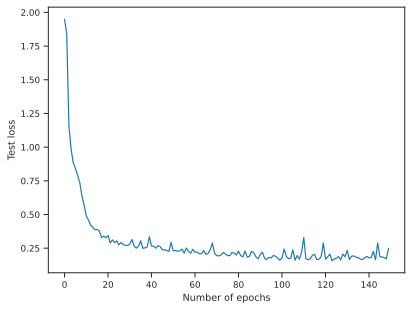

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(test_loss)
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Test loss");


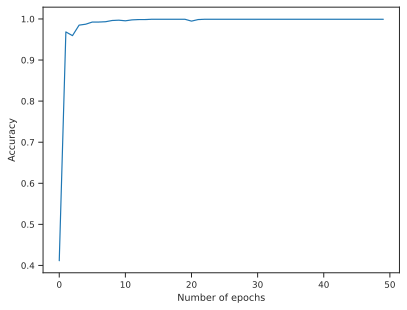

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(accuracy)
ax.set_xlabel("Number of epochs")
ax.set_ylabel("Accuracy");

In [ ]:
from sklearn.metrics import confusion_matrix
# Predict on the test data
y_pred_test = trained_model(X_test)
# Remember that the prediction is probabilistic
# We need to simply pick the label with the highest probability:
_, y_pred_labels = torch.max(y_pred_test, 1)
# Here is the confusion matrix:
cf_matrix = confusion_matrix(y_test, y_pred_labels)

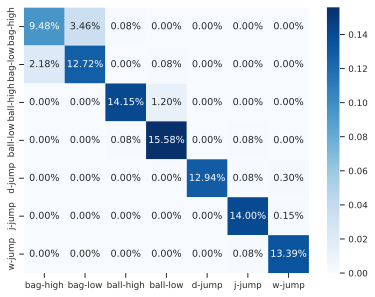

In [ ]:
sns.heatmap(
    cf_matrix / np.sum(cf_matrix),
    annot=True,
    fmt=".2%",
    cmap="Blues",
    xticklabels=LABELS_2_TO_TEXT.values(),
    yticklabels=LABELS_2_TO_TEXT.values(),
);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get update
!sudo apt-get install inkscape texlive-xetex

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [861 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,219 kB]
Get:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]


In [ ]:
!sudo apt-get install pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc
  nodejs php python libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc
  pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 56 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pando

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Shaunak_Mukherjee_ME539_HW7_PartA_final.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Shaunak_Mukherjee_ME539_HW7_PartA_final.ipynb to pdf
Failed to get connection
** (inkscape:12670): CRITICAL **: 21:28:58.223: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:12670): CRITICAL **: 21:28:58.224: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:12670): CRITICAL **: 21:28:58.224: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Failed to get connection
** (inkscape:12674): CRITICAL **: 21:28:58.902: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:12674): CRITICAL **: 21:28:58.902: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:12674): CRITICAL **: 21:28:58.902: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Failed to get connection
** (inkscape:12682): CRITICAL **: 21:28:59.365: dbus_g_proxy_new_for_name: assertion 'connection != NU